In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
import utils.genprodUtils as gen

In [4]:
class distribution:
    @classmethod
    def from_histo(cls, histo, bounds=(None, None)):
        graph = Graph.from_histo(histo)

        x = graph.x_array
        cdf = np.cumsum(graph.y_array) / np.sum(graph.y_array)

        if bounds[0] is not None:
            cdf = np.insert(cdf, 0, 0)
            x = np.insert(x, 0, bounds[0])

        if bounds[1] is not None:
            cdf = np.append(cdf, 1)
            x = np.append(x, bounds[1])

        return cls(x, cdf)

    def __init__(self, x, cdf):
        self.x = x
        self.cdf = cdf

    @property
    def graph(self):
        return Graph(self.x, self.cdf)

    def __call__(self, size):
        return np.interp(np.random.uniform(size=size), self.cdf, self.x)


In [36]:
sig = Tree(['/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/ntuples/x_hh_4b.root'], treename='Events', normalization=None)

100%|██████████| 1/1 [00:00<00:00, 18.01it/s]


100%|██████████| 1/1 [00:00<00:00, 22.25it/s]


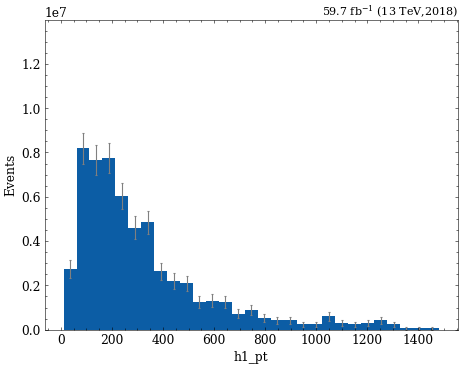

In [38]:
study.quick(
    [sig],
    varlist=['h1_pt']
)